In [107]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA

In [86]:
df = pd.read_csv('iris_data.csv')

In [87]:
df.head(1)

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa


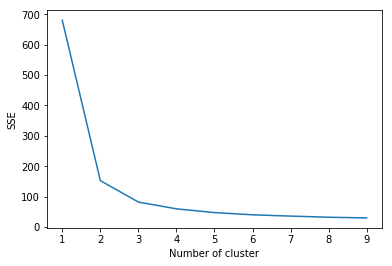

In [105]:
# finding optimum clusters - elbow
sse = {}
data = df.drop(["iris"], axis=1); #depends on data

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [154]:
df1 = df.drop(["iris"], axis=1)

In [155]:
df1.head(1)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2


In [239]:
n=3
X = df1
kmeans = KMeans(n_clusters=n, random_state=0).fit(X)

In [240]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [241]:
pca = PCA(n_components=2)
pca.fit(X)
features = pca.transform(X); #you can fit for new data
print(features.shape, labels.shape)

(150, 2) (150,)


In [242]:
labels_t = labels.reshape(1,-1).T
print(features.shape, labels_t.shape)
output = np.concatenate((features, labels_t), axis=1)
print(output.shape)

(150, 2) (150, 1)
(150, 3)


In [243]:
# output[0]
# output[output[:, 2]==0]
# output[output[:, 2]==0][0]
# output[output[:, 2]==0].transpose()[0]

In [244]:
unique_labels = set(labels); print(unique_labels)

{0, 1, 2}


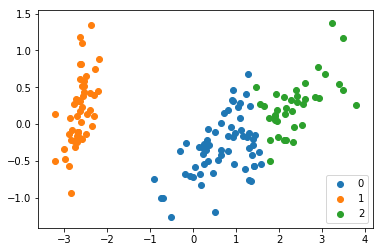

In [245]:
legend = []
for lbl in unique_labels:
    sample = output[output[:, 2]==lbl].transpose()
    plt.scatter(sample[0], sample[1])
    legend.append(lbl)
plt.legend(legend)
plt.show()

In [246]:
for lbl in unique_labels:
    sample = output[output[:, 2]==lbl]
    print(lbl, " : ", len(sample))

0  :  62
1  :  50
2  :  38
